# Formatting the judge bio data

In [1]:
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt 
import os
from sklearn.cluster import KMeans
%matplotlib inline
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)


# define folder where data resides 
DATAFOLDER = "/Users/snuffles753/Documents/NYU-GSAS/ds1003/term-project/data"

In [2]:
judges = pd.read_csv(os.path.join(DATAFOLDER, 'bios_clean2.csv'), encoding = "ISO-8859-1") 
judges.dtypes

Unnamed: 0                         int64
LastName                          object
FirstName                         object
Gender                            object
FirstUndergrad                    object
JudgeUndergradLocation            object
LawSchool                         object
JudgeLawSchoolLocation            object
Bar                               object
OtherLocationsMentioned           object
IJ_NAME                           object
Judge_name_SLR                    object
Male_judge                       float64
Court_SLR                         object
DateofAppointment                 object
Year_Appointed_SLR               float64
YearofFirstUndergradGraduatio    float64
Year_College_SLR                 float64
Year_Law_school_SLR              float64
President_SLR                     object
Government_Years_SLR             float64
Govt_nonINS_SLR                  float64
INS_Years_SLR                    float64
INS_Every5Years_SLR              float64
Military_Years_S

In [3]:
judges.describe()

,Unnamed: 0,Male_judge,Year_Appointed_SLR,YearofFirstUndergradGraduatio,Year_College_SLR,Year_Law_school_SLR,Government_Years_SLR,Govt_nonINS_SLR,INS_Years_SLR,INS_Every5Years_SLR,Military_Years_SLR,NGO_Years_SLR,Privateprac_Years_SLR,Academia_Years_SLR
count,441.00000,372.000000,369.000000,370.000000,370.000000,370.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,220.00000,0.672043,1998.360434,1975.302703,1970.267568,1980.318919,7.056452,4.620968,5.580645,1.314516,1.956989,1.048387,3.736559,0.295699
std,127.44999,0.470101,8.570529,9.264862,93.666573,9.215335,7.734791,6.689001,6.849672,1.517376,6.175622,3.507070,6.382292,1.710498
min,0.00000,0.000000,1966.000000,1940.000000,182.000000,1942.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.00000,0.000000,1994.000000,1970.000000,1970.000000,1975.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,220.00000,1.000000,1997.000000,1975.000000,1974.500000,1980.000000,5.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,330.00000,1.000000,2006.000000,1981.000000,1981.000000,1987.000000,12.000000,8.000000,10.000000,2.000000,0.000000,0.000000,5.000000,0.000000
max,440.00000,1.000000,2012.000000,1997.000000,1997.000000,2001.000000,31.000000,31.000000,32.000000,7.000000,33.000000,29.000000,35.000000,23.000000


In [31]:
judges.head(10)

,Unnamed: 0,LastName,FirstName,Gender,FirstUndergrad,JudgeUndergradLocation,LawSchool,JudgeLawSchoolLocation,Bar,OtherLocationsMentioned,IJ_NAME,Judge_name_SLR,Male_judge,Court_SLR,DateofAppointment,Year_Appointed_SLR,YearofFirstUndergradGraduatio,Year_College_SLR,Year_Law_school_SLR,President_SLR,Government_Years_SLR,Govt_nonINS_SLR,INS_Years_SLR,INS_Every5Years_SLR,Military_Years_SLR,NGO_Years_SLR,Privateprac_Years_SLR,Academia_Years_SLR,judge_name_caps,ij_code
0,0,Tabaddor,Ashley,F,"University of California, LOS ANGELES","LOS ANGELES, California",University of California Hastings College of Law,"LOS ANGELES, California",NaN,"Washington, DC; Falls Church, Virginia",A. ASHLEY TABADDOR,NaN,0.0,LOS ANGELES,Nov-05,2005.0,1994.0,1994.0,1997.0,Bush II,6.0,6.0,0.0,0.0,0.0,0.0,0.0,4.0,A. ASHLEY TABADDOR,AAT
1,1,Opaciuch,Adam,M,Manhattan College,"NEW YORK, NEW YORK",California Western,"SAN DIEGO, California",NEW YORK,"White Plains, NEW YORK",ADAM OPACIUCH,"Opaciuch, Adam",1.0,NEW YORK,Apr-98,1998.0,1980.0,1980.0,1983.0,Clinton,10.0,0.0,10.0,2.0,0.0,0.0,5.0,0.0,ADAM OPACIUCH,AO
2,2,Reese,Agnelis,F,Louisiana Tech,"Ruston, Louisiana",Southern University,"Baton Rouge, Louisiana",Louisiana,NaN,AGNELIS L. REESE,Agnelis L. Reese,0.0,OAKDALE,Apr-97,1997.0,1997.0,1977.0,1989.0,Clinton,8.0,0.0,8.0,2.0,0.0,0.0,0.0,0.0,AGNELIS L. REESE,ALR
3,3,Vomacka,Alan,M,Yale,"New Haven, Connecticut",HOUSTON,"HOUSTON, Texas",Texas,"HARLINGEN, Texas; NEW YORK, NEW YORK",ALAN A. VOMACKA,"Vomacka, Alan A.",1.0,NEW YORK,Jul-87,1987.0,1970.0,1970.0,1977.0,Reagan,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,ALAN A. VOMACKA,AAV
4,4,Page,Alan,M,Brooklyn,"NEW YORK, NEW YORK",NEW YORK Law School,"NEW YORK, NEW YORK",NEW YORK,NaN,ALAN L. PAGE,"Page, Alan L.",1.0,NEW YORK,Aug-89,1989.0,1969.0,1969.0,1975.0,Bush I,13.0,0.0,13.0,3.0,0.0,0.0,0.0,0.0,ALAN L. PAGE,ALP
5,5,Gonzalez,Alberto,M,California State,"Long Beach, California",San Fransisco,"San Fransisco, California",California,"San Francisco, California",ALBERTO E. GONZALEZ,Alberto E. Gonzalez,1.0,SAN FRANCISCO,01mar1995,1995.0,1970.0,1970.0,1979.0,Clinton,7.0,7.0,7.0,2.0,0.0,0.0,0.0,0.0,ALBERTO E. GONZALEZ,AEG
6,6,Riefkohl,Alberto,M,Puerto Rico,"San Juan, Puerto Rico",Puerto Rico,"San Juan, Puerto Rico",Puerto Rico,"NEW YORK, NEW YORK",ALBERTO J. RIEFKOHL,Alberto Riefkohl,1.0,NEWARK,Mar-95,1995.0,1968.0,1968.0,1974.0,Clinton,4.0,0.0,4.0,1.0,1.0,0.0,16.0,0.0,ALBERTO J. RIEFKOHL,AJR
7,7,Segal,Alice,F,Pennsylvania,"PHILADELPHIA, Pennsylvania",George Washington,"Washington, DC","NEW YORK, New Jersey",NaN,ALICE SEGAL,Alice Segal,0.0,NEW YORK,Oct 10,2010.0,1992.0,1992.0,1995.0,Obama,15.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,ALICE SEGAL,ASL
8,8,Daw,Alison,F,"California, Berkeley","Berkeley, California",Georgetown,"Washington, DC",California,"Jackson, California; San Jose, California",ALISON E DAW,Alison E Daw,0.0,LOS ANGELES,01may2006,2006.0,1985.0,1985.0,1988.0,Bush II,9.0,9.0,0.0,0.0,0.0,8.0,0.0,0.0,ALISON E DAW,AED
9,9,Brown,Alison,F,North Carolina at Greensboro,"Greensboro, North Carolina",North Carolina at Chapel Hill,"Chapel Hill, North Carolina",Maryland; Nebraska; North Carolina,"Omaha, Nebraska; Washington, DC; Raleigh, Nort...",ALISON M. BROWN,Alison M. Brown,0.0,CLEVELAND,NaN,NaN,1990.0,1990.0,1995.0,NaN,0.0,0.0,0.0,0.0,0.0,14.0,2.0,0.0,ALISON M. BROWN,ABM


In [10]:
path = os.path.join(DATAFOLDER, 'merged_counts.csv')
grant_rate = pd.read_csv(path, header=1, names = ["ij_code", "granted_count", "total_count"]) 
grant_rate.dtypes

ij_code           object
granted_count    float64
total_count        int64
dtype: object

In [21]:
judges_grant_rate = pd.merge(judges, grant_rate, on='ij_code', how='inner')
judges_grant_rate.describe()

,Unnamed: 0,Male_judge,Year_Appointed_SLR,YearofFirstUndergradGraduatio,Year_College_SLR,Year_Law_school_SLR,Government_Years_SLR,Govt_nonINS_SLR,INS_Years_SLR,INS_Every5Years_SLR,Military_Years_SLR,NGO_Years_SLR,Privateprac_Years_SLR,Academia_Years_SLR,granted_count,total_count
count,425.000000,369.000000,366.000000,367.000000,367.000000,367.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,416.000000,425.000000
mean,215.004706,0.674797,1998.308743,1975.256131,1970.179837,1980.277929,7.035230,4.579946,5.626016,1.325203,1.972900,1.056911,3.734417,0.298103,512.730769,1413.752941
std,124.791543,0.469087,8.563400,9.247348,94.040570,9.214453,7.735882,6.669588,6.858902,1.518881,6.198205,3.520053,6.387822,1.717247,756.978219,1470.525861
min,0.000000,0.000000,1966.000000,1940.000000,182.000000,1942.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,108.000000,0.000000,1994.000000,1970.000000,1970.000000,1975.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.750000,301.000000
50%,214.000000,1.000000,1997.000000,1975.000000,1974.000000,1980.000000,5.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,237.500000,839.000000
75%,321.000000,1.000000,2006.000000,1981.000000,1980.500000,1987.000000,12.000000,7.000000,10.000000,2.000000,0.000000,0.000000,5.000000,0.000000,633.500000,2161.000000
max,440.000000,1.000000,2012.000000,1997.000000,1997.000000,2001.000000,31.000000,31.000000,32.000000,7.000000,33.000000,29.000000,35.000000,23.000000,4993.000000,8134.000000


In [22]:
judges_formatted = judges_grant_rate.dropna(subset = ['Government_Years_SLR', 'Privateprac_Years_SLR'], how="all")
X = judges_formatted[['Government_Years_SLR', 'Privateprac_Years_SLR']].values
print(X[0:10])
print(len(X))

[[  6.   0.]
 [ 10.   5.]
 [  8.   0.]
 [  0.  10.]
 [ 13.   0.]
 [  7.   0.]
 [  4.  16.]
 [ 15.   0.]
 [  9.   0.]
 [  0.   2.]]
369


In [55]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels[0:10])

[[  1.543379     5.38356164]
 [ 14.94771242   1.37908497]]
[0 1 1 0 1 0 0 1 1 0]


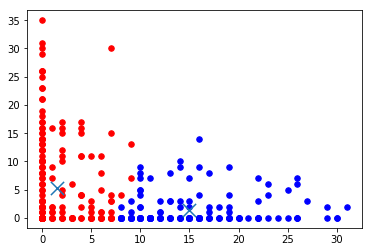

In [58]:
colors = ['r.', 'b.']

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 11)
    
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=175, linewidths=5, zorder=10)

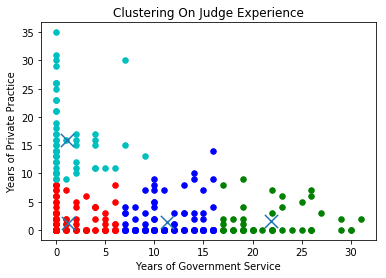

In [39]:
kmeans3 = KMeans(n_clusters=4)
kmeans3.fit(X)
centroids3 = kmeans3.cluster_centers_
labels3 = kmeans3.labels_

colors3 = ['r.', 'b.', 'c.', 'g.']
color_names = ['red', 'blue', 'cyan', 'green']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors3[labels3[i]], markersize = 11)
    
plt.scatter(centroids3[:, 0], centroids3[:, 1], marker='x', s=175, linewidths=5, zorder=10)
plt.title('Clustering On Judge Experience')
plt.xlabel('Years of Government Service')
plt.ylabel('Years of Private Practice')
plt.show()

In [25]:
predict=kmeans3.predict(X)
judges_formatted['cluster'] = pd.Series(predict, index=judges_formatted.index)
judges_formatted.describe()

/Users/snuffles753/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,Male_judge,Year_Appointed_SLR,YearofFirstUndergradGraduatio,Year_College_SLR,Year_Law_school_SLR,Government_Years_SLR,Govt_nonINS_SLR,INS_Years_SLR,INS_Every5Years_SLR,Military_Years_SLR,NGO_Years_SLR,Privateprac_Years_SLR,Academia_Years_SLR,granted_count,total_count,cluster
count,369.000000,369.000000,366.000000,367.000000,367.000000,367.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,366.000000,369.000000,369.000000
mean,186.159892,0.674797,1998.308743,1975.256131,1970.179837,1980.277929,7.035230,4.579946,5.626016,1.325203,1.972900,1.056911,3.734417,0.298103,561.748634,1544.623306,1.382114
std,107.451045,0.469087,8.563400,9.247348,94.040570,9.214453,7.735882,6.669588,6.858902,1.518881,6.198205,3.520053,6.387822,1.717247,789.231655,1509.521583,1.087381
min,0.000000,0.000000,1966.000000,1940.000000,182.000000,1942.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
25%,94.000000,0.000000,1994.000000,1970.000000,1970.000000,1975.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.500000,348.000000,0.000000
50%,186.000000,1.000000,1997.000000,1975.000000,1974.000000,1980.000000,5.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,281.500000,1015.000000,2.000000
75%,279.000000,1.000000,2006.000000,1981.000000,1980.500000,1987.000000,12.000000,7.000000,10.000000,2.000000,0.000000,0.000000,5.000000,0.000000,702.500000,2353.000000,2.000000
max,371.000000,1.000000,2012.000000,1997.000000,1997.000000,2001.000000,31.000000,31.000000,32.000000,7.000000,33.000000,29.000000,35.000000,23.000000,4993.000000,8134.000000,3.000000


In [49]:
def color_lookup(cluster):
    return color_names[cluster]
    
judges_analysis = judges_formatted[['granted_count', 'total_count', 'cluster']]
judges_analysis['color'] = judges_analysis['cluster'].apply(color_lookup)
judges_analysis.head()

/Users/snuffles753/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,granted_count,total_count,cluster,color
0,295.0,925,0,red
1,654.0,3360,0,red
2,26.0,703,0,red
3,568.0,3022,1,blue
4,245.0,1414,0,red


In [50]:
judges_analysis = judges_analysis.groupby(['color']).sum()

judges_analysis['grant_rate'] = round(judges_analysis.granted_count / judges_analysis.total_count * 100, 2)
judges_analysis.head()

,granted_count,total_count,cluster,grant_rate
color,,,,
blue,59409.0,136263,60,43.60
cyan,75320.0,211024,270,35.69
green,20599.0,60217,180,34.21
red,50272.0,162462,0,30.94


In [47]:

judges_analysis_final = judges_analysis[['grant_rate']]
judges_analysis_final.head()

,grant_rate
color,
blue,43.60
cyan,35.69
green,34.21
red,30.94
